In [ ]:
import numpy as np
import pandas as pd

In [ ]:
read=pd.read_csv('FINAL_DATASET.csv')

In [ ]:
read

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Degree_of_congestion
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,09:13:54,0.027222,14.479565,9.0,-0.40816322,Very smooth
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,09:03:01,0.032222,12.232736,9.0,1.2068965,Smooth
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:15:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,09:05:00,0.033611,11.727251,9.0,1.570248,Smooth
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:00:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
...,...,...,...,...,...,...,...,...,...
66908,1319,1104,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:01:44,0.015278,24.892663,1.0,2.1818185,Smooth
66909,1104,1106,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:02:53,0.013056,37.426898,1.0,2.9787233,Mild congestion
66910,1106,1108,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:03:50,0.036111,12.837577,1.0,7.076923,Heavy congestion
66911,39593,39385,NORMAL_VJR6_Hinjawadi Maan Phase 3 To Bhosari_...,18:06:00,0.003611,71.066206,1.0,-20.89835036,Very smooth


In [ ]:
src = read['stop_id_from'].to_numpy()
dst = read['stop_id_to'].to_numpy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
total = list(src)+list(dst)

In [ ]:
len(total)

133826

In [ ]:
label = le.fit_transform(total)

In [ ]:
len(label)

133826

In [ ]:
src=label[:66913]

In [ ]:
dst=label[66913:]

In [ ]:
src

array([2966, 2966, 2966, ...,  121, 3941, 3753])

In [ ]:
dst

array([3163, 3163, 3163, ...,  123, 3753, 3755])

In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch===1.5.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached torch-1.5.0-cp37-cp37m-manylinux1_x86_64.whl (752.0 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.5.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.5.0 which is incompatible.


In [ ]:
import dgl
# Create a DGL graph from a pair of numpy arrays
g = dgl.graph((src, dst))

Using backend: pytorch


In [ ]:
g

Graph(num_nodes=4333, num_edges=66913,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
! pip install -q torch==1.0.0 torchvision

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.0.0 which is incompatible.
torchmetrics 0.9.0 requires torch>=1.3.1, but you have torch 1.0.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.0.0 which is incompatible.


In [ ]:
import torch
print(torch.__version__)

1.5.0


In [ ]:
import torch.nn.functional as F

In [ ]:
congestion = read['Degree_of_congestion'].to_list()
edge = le.fit_transform(congestion)

In [ ]:
d=pd.DataFrame(edge)

In [ ]:
d

,0
0,3
1,2
2,0
3,2
4,0
...,...
66908,2
66909,1
66910,0
66911,3


In [ ]:
read2=pd.read_csv('node.csv')

In [ ]:
# The "Club" column represents which community does each node belong to.
# The values are of string type, so we must convert it to either categorical
# integer values or one-hot encoding.
congestion = read2['node'].to_list()
# Convert to categorical integer values with 0 for 'Mr. Hi', 1 for 'Officer'.
# club = torch.tensor([c == 'Officer' for c in club]).long()
# congestion=torch.tensor(congestion).long()
congestion = le.fit_transform(congestion)
congestion_onehot=torch.tensor(congestion).long()
# We can also convert it to one-hot encoding.
# club_onehot = F.one_hot(club)
# print(club_onehot)
# Use `g.ndata` like a normal dictionary
g.ndata.update({'congestion_onehot' : congestion_onehot})

In [ ]:
read

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Degree_of_congestion
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,09:13:54,0.027222,14.479565,9.0,-0.40816322,Very smooth
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,09:03:01,0.032222,12.232736,9.0,1.2068965,Smooth
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:15:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,09:05:00,0.033611,11.727251,9.0,1.570248,Smooth
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:00:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
...,...,...,...,...,...,...,...,...,...
66908,1319,1104,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:01:44,0.015278,24.892663,1.0,2.1818185,Smooth
66909,1104,1106,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:02:53,0.013056,37.426898,1.0,2.9787233,Mild congestion
66910,1106,1108,NORMAL_VJR6_Bhosari To Hinjawadi Maan Phase 3_...,18:03:50,0.036111,12.837577,1.0,7.076923,Heavy congestion
66911,39593,39385,NORMAL_VJR6_Hinjawadi Maan Phase 3 To Bhosari_...,18:06:00,0.003611,71.066206,1.0,-20.89835036,Very smooth


In [ ]:
read2

,node
0,36156
1,38709
2,2321
3,38783
4,38784
...,...
4328,15641
4329,38697
4330,39945
4331,34640


In [ ]:
c = read['Degree_of_congestion']

In [ ]:
congestion = read['Degree_of_congestion'].to_list()
edge = le.fit_transform(congestion)

In [ ]:
new = pd.DataFrame


In [ ]:
new=pd.DataFrame(edge)

In [ ]:
new['Degree_of_congestion']=edge

In [ ]:
# Get edge features from the DataFrame and feed it to graph.
edge_weight = torch.tensor(new['Degree_of_congestion'].to_numpy())
# Similarly, use `g.edata` for getting/setting edge features.
g.edata['weight'] = edge_weight

In [ ]:
import torch
import torch.nn as nn

In [ ]:
node_embed = nn.Embedding(g.number_of_nodes(), 5)  # Every node has an embedding of size 5.
inputs = node_embed.weight                  # Use the embedding weight as the node features.
nn.init.xavier_uniform_(inputs)

Parameter containing:
tensor([[-0.0224,  0.0185,  0.0142,  0.0267,  0.0162],
        [ 0.0092,  0.0019,  0.0012,  0.0030,  0.0059],
        [-0.0045,  0.0233,  0.0327, -0.0218, -0.0269],
        ...,
        [ 0.0030,  0.0234,  0.0221, -0.0128, -0.0344],
        [ 0.0288,  0.0227,  0.0014, -0.0168, -0.0262],
        [ 0.0031, -0.0233, -0.0147, -0.0347, -0.0132]], requires_grad=True)

In [ ]:
labels = g.ndata['congestion_onehot']
labeled_nodes = [0, 4332]

In [ ]:
from scipy.sparse import coo_matrix
u, v = g.edges()

eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_size = int(len(eids) * 0.1)
train_size = g.number_of_edges() - test_size
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

# Find all negative edges and split them for training and testing
adj = coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)

neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

In [ ]:
train_g = dgl.remove_edges(g, eids[:test_size])

In [ ]:
from dgl.nn import SAGEConv

# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

In [ ]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

In [ ]:
import dgl.function as fn

class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score']

In [ ]:
import tensorflow as tf

In [ ]:
train_g

Graph(num_nodes=4333, num_edges=60222,
      ndata_schemes={'congestion_onehot': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.int64)})

In [ ]:
from sklearn.metrics import roc_auc_score
model = GraphSAGE(train_g.ndata['congestion_onehot'].shape[0],4333)
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(16)
pred = DotPredictor()

def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return roc_auc_score(labels, scores)

In [ ]:
import itertools

In [ ]:
y = train_g.ndata['congestion_onehot']

In [ ]:
y = y.to(torch.float)


In [ ]:
y.shape

torch.Size([4333])

In [ ]:
train_g

Graph(num_nodes=4333, num_edges=60222,
      ndata_schemes={'congestion_onehot': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.int64)})

In [ ]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
for e in range(100):
    # forward
    h = model(train_g, y)
    pos_scores = pred(train_pos_g,h)
    neg_scores = pred(train_neg_g, h)
    loss = compute_loss(pos_scores, neg_scores)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 10 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))
    
    

In epoch 0, loss: 13139846.0
In epoch 10, loss: 0.6931430697441101
In epoch 20, loss: 0.6931335926055908
In epoch 30, loss: 0.6931207180023193
In epoch 40, loss: 0.6931206583976746
In epoch 50, loss: 0.6931141018867493
In epoch 60, loss: 0.6931031346321106
In epoch 70, loss: 0.6930977702140808
In epoch 80, loss: 0.6930964589118958
In epoch 90, loss: 0.6930962204933167
AUC 0.5013304152442598


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.11.0-cp37-cp37m-manylinux1_x86_64.whl (750.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.0.0
    Uninstalling torch-1.0.0:
      Successfully uninstalled torch-1.0.0


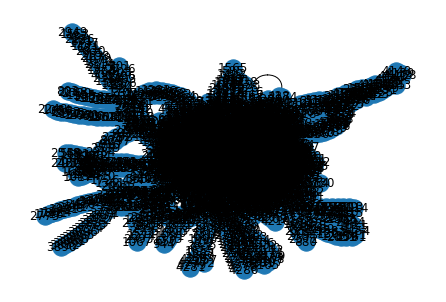

In [ ]:
import networkx as nx
# Since the actual graph is undirected, we convert it for visualization purpose.
nx_g = g.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_g)
nx.draw(nx_g,pos, with_labels=True)